Лабораторна робота 9

1. Створення набору даних

In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
train_dir = 'C:/Users/Lenovo Legion 5/Downloads/archive/chest_xray/train'
test_dir = 'C:/Users/Lenovo Legion 5/Downloads/archive/chest_xray/test'

from tensorflow.keras.utils import Sequence

class MyDataset(Sequence):
    def __init__(self, *args, **kwargs):
        # Виклик конструктора батьківського класу
        super().__init__(**kwargs)
        # Ваша власна логіка
        self.args = args


# Ініціалізація генераторів даних
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')


Found 2101 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


2. Реалізація моделі CNN

In [43]:

# Клас MyDataset для можливого розширення можливостей генератора
class MyDataset(Sequence):
    def __init__(self, *args, **kwargs):
        # Виклик конструктора батьківського класу
        super().__init__(**kwargs)
        # Ваша власна логіка
        self.args = args

# Створення моделі CNN
model = models.Sequential()

# Згортковий шар 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Згортковий шар 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Згортковий шар 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Перетворення до одномірного вектору перед передачею в повністю зв'язаний шар
model.add(layers.Flatten())

# Повністю зв'язаний шар
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Використовуємо sigmoid для бінарної класифікації

# Виведення архітектури моделі
model.summary()

# Компіляція моделі
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_105 (Conv2D)             │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_99 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_100               │ (None, 36, 36, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_101               │ (None, 17, 17, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_33 (Flatten)            │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

3. Тренування та тестування моделі

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 498ms/step - accuracy: 0.6898 - loss: 0.6834 - val_accuracy: 0.8617 - val_loss: 0.2583
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 468ms/step - accuracy: 0.8714 - loss: 0.3032 - val_accuracy: 0.9289 - val_loss: 0.2078
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 471ms/step - accuracy: 0.9083 - loss: 0.2516 - val_accuracy: 0.9091 - val_loss: 0.2504
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 467ms/step - accuracy: 0.9049 - loss: 0.2299 - val_accuracy: 0.8893 - val_loss: 0.2977
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 470ms/step - accuracy: 0.9092 - loss: 0.2263 - val_accuracy: 0.8972 - val_loss: 0.2346
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 471ms/step - accuracy: 0.9149 - loss: 0.2193 - val_accuracy: 0.8933 - val_loss: 0.2663
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 471ms/step - accuracy: 0.9303 - loss: 0.1942 - val_accuracy: 0.9130 - val_loss: 0.2290
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 473ms/step - accuracy: 0.9322 - loss: 0

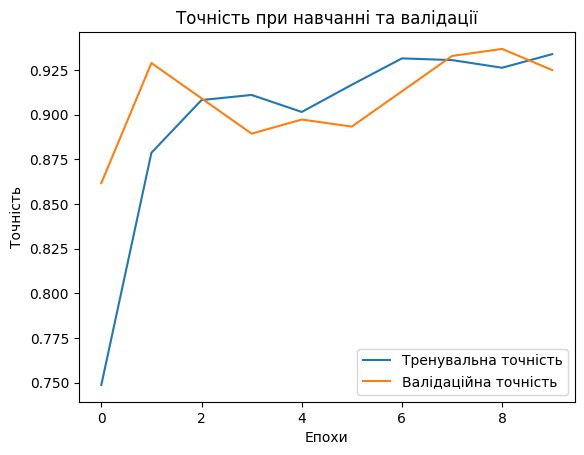

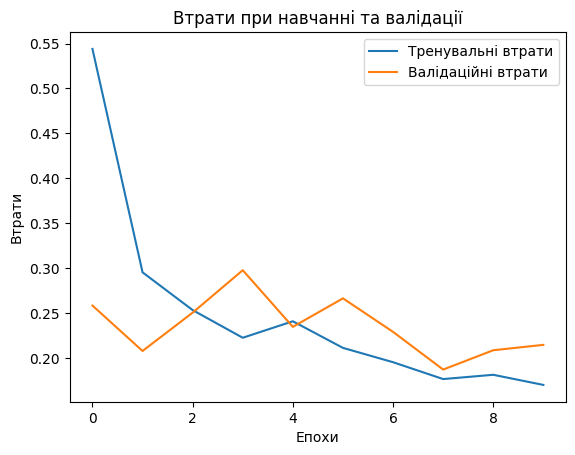

In [44]:
# Тренування моделі
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # кількість кроків на одну епоху
    epochs=10,
    validation_data=test_generator,
    validation_steps=50  # кількість кроків для валідації
)

# Візуалізація точності
plt.plot(history.history['accuracy'], label='Тренувальна точність')
plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
plt.title('Точність при навчанні та валідації')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

# Візуалізація втрат
plt.plot(history.history['loss'], label='Тренувальні втрати')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Втрати при навчанні та валідації')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.show()


4. Оцінка результатів
python
Копіювати код


In [ ]:
# Оцінка ефективності моделі на тестових даних
test_loss, test_accuracy = model.evaluate(test_generator)

# Виведення результату тестування
print(f'Тестова точність: {test_accuracy*100:.2f}%')
